In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
p_all = pd.read_csv('./../principals_concat.csv')
print(p_all.shape)
p_all.head()

(1712935, 6)


,tconst,ordering,nconst,category,job,characters
0,tt0011801,10,nm0459029,actor,\N,"[""Impresario Costi Theater""]"
1,tt0011801,1,nm0681726,actor,\N,"[""Musiker Erik Paulsen""]"
2,tt0011801,2,nm0692612,actress,\N,"[""Karin, Tochter Brückner""]"
3,tt0011801,3,nm0726256,actor,\N,"[""Sebald, Sohn Brückner""]"
4,tt0011801,4,nm0776458,actor,\N,"[""Eriks Sohn""]"


In [27]:
movies = pd.read_csv('./filtered_movies.csv')

In [28]:
movie_ids = movies.tconst.to_list()

In [66]:
# p_0 = pd.read_csv('./../principals/principals_0_00.tsv', delimiter='\t')
# print('Done')
# p_0 = p_0[p_0.tconst.isin(movie_ids)]

In [67]:
# p_1 = pd.read_csv('./../principals/principals_1_010.tsv', delimiter='\t')
# print('Done')
# p_1 = p_1[p_1.tconst.isin(movie_ids)]

In [68]:
# p_2 = pd.read_csv('./../principals/principals_2_011.tsv', delimiter='\t')
# print('Done')
# p_2 = p_2[p_2.tconst.isin(movie_ids)]

In [69]:
# p_3 = pd.read_csv('./../principals/principals_3_10.tsv', delimiter='\t', on_bad_lines='warn')
# # p_3 = pd.read_csv('./../principals/principals_3_10.tsv', delimiter='\t')
# print('Done')
# p_3 = p_3[p_3.tconst.isin(movie_ids)]

In [70]:
# p_4 = pd.read_csv('./../principals/principals_4_110.tsv', delimiter='\t', on_bad_lines='warn')
# print('Done')
# p_4 = p_4[p_4.tconst.isin(movie_ids)]

In [71]:
# p_5 = pd.read_csv('./../principals/principals_5_111.tsv', delimiter='\t', on_bad_lines='warn')
# p_5 = p_5[p_5.tconst.isin(movie_ids)]

In [72]:
# principals = [p_0, p_1, p_2, p_3, p_4, p_5]
# count = 0
# for p in principals:
#     c = p.tconst.unique().shape[0]
#     count += c
#     print(c)

In [73]:
# p_all = pd.concat(principals)
# print(p_all.shape)

In [20]:
# p_all.to_csv('p_all.csv', index=False)

In [75]:
p_movies = p_all.tconst.to_list()

In [76]:
overlap = [i for i in movie_ids if i in p_movies]

In [77]:
len(overlap)

3585

In [78]:
[i for i in movie_ids if i not in overlap]

['tt1233334', 'tt0273517']

In [79]:
'tt0273517' in p_all.tconst.to_list()

False

# Notes: 2 movies are missing from principal data

In [83]:
cols_to_drop = ['index', 'titleType', 'isAdult', 'endYear', 'tmdb_id', 'og_language', 'Unnamed: 18']
movies = movies.drop(columns=cols_to_drop, axis=1)
movies.head()

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,budget,revenue,ratio,ROI,averageRating,numVotes
0,tt1179904,Paranormal Activity,Paranormal Activity,2007,86,"Horror,Mystery",230000,194183034,0.001184,844.274061,6.3,238846
1,tt0390521,Super Size Me,Super Size Me,2004,100,Documentary,65000,28575078,0.002275,439.616585,7.2,108792
2,tt2309260,The Gallows,The Gallows,2015,81,"Horror,Mystery,Thriller",100000,42664410,0.002344,426.644100,4.2,20611
3,tt0876294,Zombie Diaries,The Zombie Diaries,2006,85,"Horror,Sci-Fi",9300,2000000,0.004650,215.053763,4.0,4755
4,tt0907657,Once,Once,2007,86,"Drama,Music,Romance",160000,20710513,0.007726,129.440706,7.8,116662


In [100]:
principals = p_all[p_all.tconst.isin(movie_ids)]
principals = principals[principals.category.isin(['actor', 'actress'])]
print(principals.shape)

(14122, 6)


In [87]:
# pd.merge(principals, movies, left_on='tconst', right_on='tconst', how='left')

In [101]:
people_list = pd.DataFrame(principals.groupby('tconst')['nconst'].apply(list)).reset_index()
people_list

,tconst,nconst
0,tt0035423,"[nm0000212, nm0413168, nm0000630, nm0005227]"
1,tt0118589,"[nm0001014, nm0073160, nm0066586, nm0004771]"
2,tt0120467,"[nm0641168, nm0424682, nm0507915, nm0839486]"
3,tt0120667,"[nm0344435, nm0004821, nm0262635, nm0004695]"
4,tt0120679,"[nm0000161, nm0000547, nm0001691, nm0535502]"
...,...,...
3535,tt8772262,"[nm6073955, nm2930503, nm9859585, nm2860379]"
3536,tt8946378,"[nm0185819, nm0262635, nm1869101, nm0000130]"
3537,tt9134216,"[nm1078479, nm1221047, nm0000491, nm0541932]"
3538,tt9285882,"[nm7906702, nm1951953, nm8780185, nm1080139]"


In [102]:
pd.merge(movies, people_list, left_on='tconst', right_on='tconst', how='left')

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,budget,revenue,ratio,ROI,averageRating,numVotes,nconst
0,tt1179904,Paranormal Activity,Paranormal Activity,2007,86,"Horror,Mystery",230000,194183034,0.001184,844.274061,6.3,238846,"[nm2209370, nm2913790, nm2104166, nm2910808]"
1,tt0390521,Super Size Me,Super Size Me,2004,100,Documentary,65000,28575078,0.002275,439.616585,7.2,108792,NaN
2,tt2309260,The Gallows,The Gallows,2015,81,"Horror,Mystery,Thriller",100000,42664410,0.002344,426.644100,4.2,20611,"[nm3790547, nm6018502, nm4090362, nm2258992]"
3,tt0876294,Zombie Diaries,The Zombie Diaries,2006,85,"Horror,Sci-Fi",9300,2000000,0.004650,215.053763,4.0,4755,"[nm0014714, nm2428131, nm2408572, nm0286170]"
4,tt0907657,Once,Once,2007,86,"Drama,Music,Romance",160000,20710513,0.007726,129.440706,7.8,116662,"[nm0360598, nm2461627, nm2008013, nm2478608]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3582,tt1935194,Overdrive,Overdrive,2017,93,"Action,Adventure,Crime",28210303,7793,3619.954190,0.000276,5.3,14982,"[nm2207222, nm7188414, nm1869101, nm4719349]"
3583,tt1376213,The Adventurer: The Curse of the Midas Box,The Adventurer: The Curse of the Midas Box,2013,100,"Adventure,Family,Fantasy",25000000,6399,3906.860447,0.000256,5.4,6779,"[nm2902567, nm0790688, nm0372176, nm0000554]"
3584,tt7869070,The Fanatic,The Fanatic,2019,88,"Crime,Thriller",18000000,3153,5708.848716,0.000175,4.2,11981,"[nm0000237, nm0001701, nm3132111, nm3626674]"
3585,tt0254703,The Point Men,The Point Men,2001,100,"Action,Drama",6100000,714,8543.417367,0.000117,4.3,1161,"[nm0000483, nm0289098, nm0716490, nm0531229]"


In [116]:
missing_cast = [i for i in movie_ids if i not in people_list.tconst.to_list()]
movies[movies.tconst.isin(missing_cast)].shape

(47, 12)

In [114]:
p_all[p_all.tconst == 'tt1232207']

,tconst,ordering,nconst,category,job,characters
444135,tt1232207,10,nm2770339,editor,\N,\N
444136,tt1232207,1,nm0601619,self,\N,"[""Self""]"
444137,tt1232207,2,nm3398139,self,\N,"[""Self""]"
444138,tt1232207,3,nm0141699,archive_footage,\N,"[""Self""]"
444139,tt1232207,4,nm3067972,self,\N,"[""Self""]"
444140,tt1232207,5,nm2154696,producer,producer,\N
444141,tt1232207,6,nm1345020,composer,\N,\N
444142,tt1232207,7,nm0550065,cinematographer,\N,\N
444143,tt1232207,8,nm1026832,cinematographer,\N,\N
444144,tt1232207,9,nm1755190,editor,\N,\N


In [110]:
movies[movies.tconst == 'tt0903943']

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,budget,revenue,ratio,ROI,averageRating,numVotes
3325,tt0903943,The End of Poverty?,The End of Poverty?,2008,106,Documentary,1000000,57805,17.299542,0.057805,7.4,455


In [113]:
movies[movies.genres.str.contains('Documentary')].shape

(69, 12)

In [120]:
movies[movies.genres.str.contains('News')]

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,budget,revenue,ratio,ROI,averageRating,numVotes
24,tt0497116,An Inconvenient Truth,An Inconvenient Truth,2006,96,"Documentary,News",1000000,46243000,0.021625,46.243000,7.4,83413
180,tt0388789,Born Into Brothels: Calcutta's Red Light Kids,Born Into Brothels: Calcutta's Red Light Kids,2004,85,"Biography,Documentary,News",350000,3529201,0.099173,10.083431,7.2,17309


In [122]:
movies = movies[~movies.tconst.isin(missing_cast)]
print(movies.shape)
movies.head()

(3540, 12)


,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,budget,revenue,ratio,ROI,averageRating,numVotes
0,tt1179904,Paranormal Activity,Paranormal Activity,2007,86,"Horror,Mystery",230000,194183034,0.001184,844.274061,6.3,238846
2,tt2309260,The Gallows,The Gallows,2015,81,"Horror,Mystery,Thriller",100000,42664410,0.002344,426.644100,4.2,20611
3,tt0876294,Zombie Diaries,The Zombie Diaries,2006,85,"Horror,Sci-Fi",9300,2000000,0.004650,215.053763,4.0,4755
4,tt0907657,Once,Once,2007,86,"Drama,Music,Romance",160000,20710513,0.007726,129.440706,7.8,116662
5,tt0374900,Napoleon Dynamite,Napoleon Dynamite,2004,96,Comedy,400000,46118097,0.008673,115.295243,6.9,218880


In [123]:
movies_exp = movies.assign(genres_sep=movies['genres'].str.split(',')).explode('genres_sep')
movies_exp.head()

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,budget,revenue,ratio,ROI,averageRating,numVotes,genres_sep
0,tt1179904,Paranormal Activity,Paranormal Activity,2007,86,"Horror,Mystery",230000,194183034,0.001184,844.274061,6.3,238846,Horror
0,tt1179904,Paranormal Activity,Paranormal Activity,2007,86,"Horror,Mystery",230000,194183034,0.001184,844.274061,6.3,238846,Mystery
2,tt2309260,The Gallows,The Gallows,2015,81,"Horror,Mystery,Thriller",100000,42664410,0.002344,426.644100,4.2,20611,Horror
2,tt2309260,The Gallows,The Gallows,2015,81,"Horror,Mystery,Thriller",100000,42664410,0.002344,426.644100,4.2,20611,Mystery
2,tt2309260,The Gallows,The Gallows,2015,81,"Horror,Mystery,Thriller",100000,42664410,0.002344,426.644100,4.2,20611,Thriller


In [126]:
movies_exp.genres_sep.value_counts()

Drama          1884
Comedy         1252
Action          993
Crime           705
Thriller        641
Romance         626
Adventure       625
Horror          443
Mystery         397
Fantasy         310
Sci-Fi          302
Biography       294
Family          207
History         124
Music           114
Sport            84
War              44
Musical          30
Documentary      25
Western          22
News              2
Name: genres_sep, dtype: int64

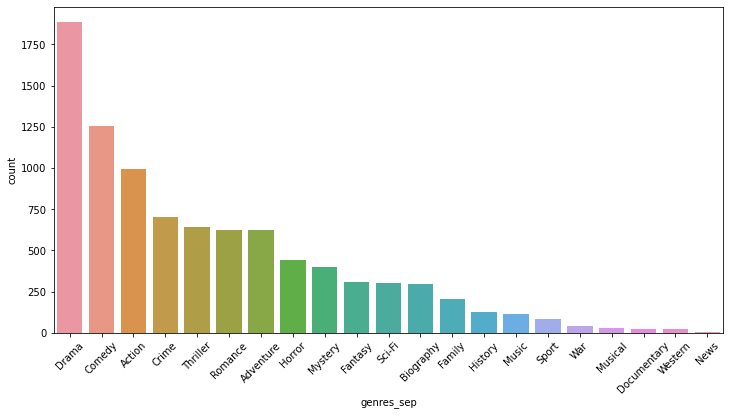

In [125]:
plt.figure(figsize=(12, 6))

sns.countplot(data=movies_exp, x='genres_sep', order=movies_exp.genres_sep.value_counts().index)

plt.tick_params(axis='x', rotation=45)

plt.show()

In [127]:
movies

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,budget,revenue,ratio,ROI,averageRating,numVotes
0,tt1179904,Paranormal Activity,Paranormal Activity,2007,86,"Horror,Mystery",230000,194183034,0.001184,844.274061,6.3,238846
2,tt2309260,The Gallows,The Gallows,2015,81,"Horror,Mystery,Thriller",100000,42664410,0.002344,426.644100,4.2,20611
3,tt0876294,Zombie Diaries,The Zombie Diaries,2006,85,"Horror,Sci-Fi",9300,2000000,0.004650,215.053763,4.0,4755
4,tt0907657,Once,Once,2007,86,"Drama,Music,Romance",160000,20710513,0.007726,129.440706,7.8,116662
5,tt0374900,Napoleon Dynamite,Napoleon Dynamite,2004,96,Comedy,400000,46118097,0.008673,115.295243,6.9,218880
...,...,...,...,...,...,...,...,...,...,...,...,...
3582,tt1935194,Overdrive,Overdrive,2017,93,"Action,Adventure,Crime",28210303,7793,3619.954190,0.000276,5.3,14982
3583,tt1376213,The Adventurer: The Curse of the Midas Box,The Adventurer: The Curse of the Midas Box,2013,100,"Adventure,Family,Fantasy",25000000,6399,3906.860447,0.000256,5.4,6779
3584,tt7869070,The Fanatic,The Fanatic,2019,88,"Crime,Thriller",18000000,3153,5708.848716,0.000175,4.2,11981
3585,tt0254703,The Point Men,The Point Men,2001,100,"Action,Drama",6100000,714,8543.417367,0.000117,4.3,1161


In [130]:
movies_cast = pd.merge(movies, people_list, left_on='tconst', right_on='tconst', how='left')
movies_cast

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,budget,revenue,ratio,ROI,averageRating,numVotes,nconst
0,tt1179904,Paranormal Activity,Paranormal Activity,2007,86,"Horror,Mystery",230000,194183034,0.001184,844.274061,6.3,238846,"[nm2209370, nm2913790, nm2104166, nm2910808]"
1,tt2309260,The Gallows,The Gallows,2015,81,"Horror,Mystery,Thriller",100000,42664410,0.002344,426.644100,4.2,20611,"[nm3790547, nm6018502, nm4090362, nm2258992]"
2,tt0876294,Zombie Diaries,The Zombie Diaries,2006,85,"Horror,Sci-Fi",9300,2000000,0.004650,215.053763,4.0,4755,"[nm0014714, nm2428131, nm2408572, nm0286170]"
3,tt0907657,Once,Once,2007,86,"Drama,Music,Romance",160000,20710513,0.007726,129.440706,7.8,116662,"[nm0360598, nm2461627, nm2008013, nm2478608]"
4,tt0374900,Napoleon Dynamite,Napoleon Dynamite,2004,96,Comedy,400000,46118097,0.008673,115.295243,6.9,218880,"[nm1417647, nm0708293, nm0340973, nm1088052]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,tt1935194,Overdrive,Overdrive,2017,93,"Action,Adventure,Crime",28210303,7793,3619.954190,0.000276,5.3,14982,"[nm2207222, nm7188414, nm1869101, nm4719349]"
3536,tt1376213,The Adventurer: The Curse of the Midas Box,The Adventurer: The Curse of the Midas Box,2013,100,"Adventure,Family,Fantasy",25000000,6399,3906.860447,0.000256,5.4,6779,"[nm2902567, nm0790688, nm0372176, nm0000554]"
3537,tt7869070,The Fanatic,The Fanatic,2019,88,"Crime,Thriller",18000000,3153,5708.848716,0.000175,4.2,11981,"[nm0000237, nm0001701, nm3132111, nm3626674]"
3538,tt0254703,The Point Men,The Point Men,2001,100,"Action,Drama",6100000,714,8543.417367,0.000117,4.3,1161,"[nm0000483, nm0289098, nm0716490, nm0531229]"


In [135]:
movies_cast.to_csv('movies_cast.csv', index=False)

In [143]:
casts = list(principals.nconst.unique())
len(casts)

5273

In [144]:
names = pd.read_csv('./../name_basics.csv')
print(names.shape)
names.head()

(11931746, 6)


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0031983,tt0050419"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0038355,tt0071877,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0057345,tt0049189,tt0056404"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0077975,tt0078723,tt0072562,tt0080455"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0060827,tt0050976,tt0050986"


In [146]:
names[names.nconst.isin(casts)]

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0038355,tt0071877,tt0117057"
7,nm0000008,Marlon Brando,1924,2004,"actor,soundtrack,director","tt0070849,tt0078788,tt0068646,tt0047296"
83,nm0000084,Gong Li,1965,\N,"actress,producer","tt0473444,tt0430357,tt0397535,tt0101640"
89,nm0000090,Armin Mueller-Stahl,1930,\N,"actor,director,writer","tt0117631,tt0765443,tt0963178,tt0139809"
91,nm0000092,John Cleese,1939,\N,"actor,writer,producer","tt0071853,tt0063929,tt0085959,tt0095159"
...,...,...,...,...,...,...
11814952,nm9858133,Eric Borsuk,\N,\N,actor,tt6212478
11816241,nm9859585,Vilhelm Blomgren,\N,\N,actor,"tt8772262,tt7915546,tt8456154,tt1893273"
11831701,nm9877392,Roman Griffin Davis,2007,\N,actor,"tt2584384,tt11628854"
11922017,nm9982380,Gabriel Sky,\N,\N,"actor,stunts","tt6857376,tt1780967,tt4624366,tt5536400"


In [147]:
names.to_csv('names.csv', index=False)